In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
test['SalePrice'] = np.nan
train['data'] = 'train'
test['data'] = 'test'


In [8]:
all_data = pd.concat([train,test],axis =0)

In [9]:
all_data.shape

(2919, 82)

In [10]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,test
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,test
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,test
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,test


In [11]:
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
pd.options.display.max_rows = 200

In [13]:
all_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [14]:
all_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1, inplace = True)

In [15]:
all_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 78 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [17]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [18]:
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean())

In [19]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna(all_data['MasVnrType'].mode()[0])

In [20]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].mean())

In [21]:
all_data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [22]:
all_data['BsmtQual'] = all_data['BsmtQual'].fillna(all_data['BsmtQual'].mode()[0])

In [23]:
all_data['BsmtCond'] = all_data['BsmtCond'].fillna(all_data['BsmtCond'].mode()[0])

In [24]:
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna(all_data['BsmtExposure'].mode()[0])

In [25]:
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna(all_data['BsmtFinType1'].mode()[0])

In [26]:
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(all_data['BsmtFinSF1'].mean())

In [27]:
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna(all_data['BsmtFinType2'].mode()[0])

In [28]:
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(all_data['BsmtFinSF2'].mean())

In [29]:
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(all_data['BsmtUnfSF'].mean())

In [30]:
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].mean())

In [31]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [32]:
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(all_data['BsmtFullBath'].mode()[0])

In [33]:
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(all_data['BsmtHalfBath'].mode()[0])

In [34]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [35]:
all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])

In [36]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna(value = 'No Fireplace')

In [37]:
all_data['GarageType'] = all_data['GarageType'].fillna(all_data['GarageType'].mode()[0])

In [38]:
all_data.drop('GarageYrBlt', axis =1, inplace = True)

In [39]:
all_data['GarageFinish'] = all_data['GarageFinish'].fillna(value = 'No Garage')

In [40]:
all_data.drop(['GarageCars'], axis =1, inplace = True)

In [41]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(all_data['GarageArea'].mean())

In [42]:
all_data['GarageCond'] = all_data['GarageCond'].fillna(value = 'No Garage')

In [43]:
all_data['GarageQual'] = all_data['GarageQual'].fillna(value = 'No Garage')

In [44]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [45]:
all_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [46]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

In [47]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [48]:
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

In [49]:
all_data.isnull().sum().sum()

1459

In [50]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000.0,train


In [51]:
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'Enclo

In [52]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

In [53]:
all_data.drop('Id', axis = 1, inplace =True)

In [54]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000.0,train


In [55]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
MSSubClass       2919 non-null object
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 n

In [56]:
# selecting all categorical columns
cat_cols = all_data.select_dtypes('object').columns

In [57]:
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition', 'data'],
      dtype='object')

In [58]:
cat_cols = cat_cols[:-1] #no need data column

In [59]:
for col in cat_cols:
    freqs = all_data[col].value_counts()
    k = freqs.index[freqs>20][:-1]
    for cat in k:
        name = col+'_'+cat
        all_data[name] = (all_data[col]==cat).astype(int)
    del all_data[col]
    print(col)

MSSubClass
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [60]:
all_data.shape

(2919, 186)

In [61]:
all_data.isnull().sum().sum()

1459

In [90]:
data_train = all_data[all_data['data'] == 'train']
del data_train['data']
data_test = all_data[all_data['data'] == 'test']
del data_test['data']

In [91]:
print(data_train.shape)
print(data_test.shape)

(1460, 185)
(1459, 185)


In [92]:
data_test.drop('SalePrice', axis =1, inplace = True)

C:\Users\niran\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [93]:
data_test.shape

(1459, 184)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X = data_train.drop('SalePrice', axis=1)
y = data_train['SalePrice']

In [96]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [97]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1168, 184)
(292, 184)
(1168,)
(292,)


In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lin_reg = LinearRegression()

In [100]:

lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score: {lin_reg.score(x_val, y_val)}')

Coefficients: [-1.17100611e+02  4.06047560e-01  9.21330077e+03  4.36700043e+03
  2.13679559e+02  6.03108496e+01  6.48230653e+00 -2.38094215e+00
  4.06645432e+00 -3.04986616e+00 -1.36427107e+00  1.51701211e+01
  3.68297208e+01 -2.61234495e+01  2.58764041e+01  6.38081605e+03
  3.08860079e+03  8.45236963e+03  3.55572183e+03 -3.51738109e+03
 -1.11854237e+04  2.99328013e+03  5.85768949e+03  1.86655859e+01
  1.85371387e+01 -1.30292304e+01  1.81594514e+01  5.24021484e+01
  5.13242308e+01 -7.19964505e+00 -5.52839134e-01 -3.94207803e+02
 -4.87113088e+02  3.48390031e+03 -7.16835898e+03  1.04933614e+04
 -6.51380635e+03  5.25885035e+03  7.18047720e+03 -1.15266241e+04
  1.22138204e+04 -1.19062715e+04 -2.01160075e+04 -3.95113919e+03
  2.08710234e+04  2.09140926e+04  2.96622382e+04  1.62470935e+04
  6.06140803e+03  4.11922733e+03  3.64102122e+03  1.06038256e+04
 -1.58346591e+04  9.01337557e+03  1.32252096e+04  2.18198819e+04
 -8.19428782e+03 -1.33303328e+04 -5.02975626e+03 -1.98320203e+04
 -2.6072659

In [102]:
import scipy.stats as stats
import statsmodels.api as sm

In [119]:
x_constant = sm.add_constant(X)
model = sm.OLS(y,x_constant).fit()
mod_sum = model.summary()
mod_sum

C:\Users\niran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     59.01
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:21:52   Log-Likelihood:                -16920.
No. Observations:                1460   AIC:                         3.420e+04
Df Residuals:                    1280   BIC:                         3.515e+04
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     6.648e+05   9.73e+05      0.683      0.495   -1.24e+06    2.57e+06
LotFrontage               -141.7188     49.199     -2.881      0.004    -238.238     -45.199
LotArea                      0.3283      0.105      3.137      0.002       0.123       0.534
OverallQual               8057.9116   1202.308      6.702      0.000    5699.201    1.04e+04
OverallCond               4649.2022   1023.170      4.544      0.000    2641.928    6656.477
YearBuilt                  131.1121     95.584      1.372      0.170     -56.406     318.630
YearRemodAdd                48.3237     65.435      0.739      0.460     -80.047     176.695
MasVnrArea                  12.3493      6.896      1.791      0.074      -1.178      25.877
BsmtFinSF1                  -2.1834      3.218     -0.679      0.498      -8.496       4.129
BsmtFinSF2                   2.1614      6.971      0.310      0.757     -11.515      15.837
BsmtUnfSF                    0.3198      3.094      0.103      0.918      -5.750       6.389
TotalBsmtSF                  0.2978      3.842      0.078      0.938      -7.239       7.835
1stFlrSF                     9.3933      6.139      1.530      0.126      -2.651      21.438
2ndFlrSF                    25.8158      6.066      4.256      0.000      13.916      37.716
LowQualFinSF                -2.6725     13.491     -0.198      0.843     -29.140      23.795
GrLivArea                   32.5366      5.424      5.999      0.000      21.897      43.177
BsmtFullBath              6373.5808   2353.300      2.708      0.007    1756.833     1.1e+04
BsmtHalfBath              1744.7204   3577.080      0.488      0.626   -5272.863    8762.304
FullBath                  9323.0761   2613.763      3.567      0.000    4195.346    1.45e+04
HalfBath                  5050.0053   2477.028      2.039      0.042     190.524    9909.486
BedroomAbvGr             -3127.8986   1643.742     -1.903      0.057   -6352.622      96.825
KitchenAbvGr             -1.399e+04   6710.941     -2.084      0.037   -2.72e+04    -820.609
TotRmsAbvGrd              3137.5385   1123.409      2.793      0.005     933.614    5341.463
Fireplaces                5520.3977   3056.104      1.806      0.071    -475.126    1.15e+04
GarageArea                  23.2839      6.366      3.658      0.000      10.795      35.773
WoodDeckSF                  20.5109      6.978      2.939      0.003       6.821      34.201
OpenPorchSF                 -3.3151     13.566     -0.244      0.807     -29.930      23.299
EnclosedPorch               12.9548     14.648      0.884      0.377     -15.782      41.691
3SsnPorch                   48.5461     26.367      1.841      0.066      -3.181     100.273
ScreenPorch                 48.4891     14.510      3.342      0.001      20.023      76.955
PoolArea      

tf_train = data_train.apply(lambda x : x**0.5)
tf_train

X = tf_train.drop('SalePrice', axis = 1)
y = tf_train['SalePrice']

x_constant = sm.add_constant(X)
model = sm.OLS(y,x_constant).fit()
model.summary()

In [105]:
sns.set(style = 'whitegrid')
data_train['predictions'] = model.predict(x_constant)
residuals = model.resid

C:\Users\niran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


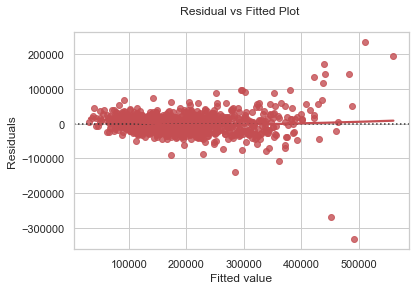

In [106]:
resi = sns.residplot(data_train.predictions, residuals, lowess = True, color = 'r')
resi.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

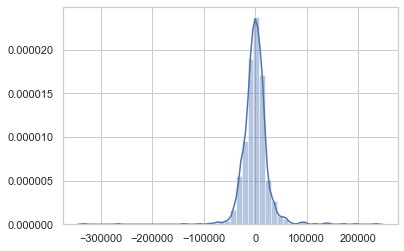

In [123]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

In [107]:
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 2)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1168, 184)
(292, 184)
(1168,)
(292,)


In [108]:
from sklearn.linear_model import Lasso

In [109]:
lasso = Lasso(alpha = 0.0005)
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
val_score=lasso.score(x_val,y_val)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("validation score: ",val_score)
print("number of features used: ", coeff_used)

training score: 0.8860013439622877
validation score:  0.8882513276786443
number of features used:  184


C:\Users\niran\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414299669746.4453, tolerance: 726904594.7462254
  positive)


In [110]:
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
val_score=lasso.score(x_val,y_val)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("validation score: ",val_score)
print("number of features used: ", coeff_used)

training score: 0.8860013435843895
validation score:  0.8882514836963706
number of features used:  184


C:\Users\niran\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414268561247.0611, tolerance: 726904594.7462254
  positive)


In [111]:
lasso = Lasso(alpha = 0.0054654)
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
val_score=lasso.score(x_val,y_val)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("validation score: ",val_score)
print("number of features used: ", coeff_used)

training score: 0.8860013398513532
validation score:  0.8882528763621584
number of features used:  184


C:\Users\niran\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413988617769.2794, tolerance: 726904594.7462254
  positive)


In [112]:
lasso = Lasso(alpha = 0.00099)
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
val_score=lasso.score(x_val,y_val)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("validation score: ",val_score)
print("number of features used: ", coeff_used)

training score: 0.8860013435920269
validation score:  0.8882514805761027
number of features used:  184


C:\Users\niran\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414269183860.58386, tolerance: 726904594.7462254
  positive)


In [120]:
predicted = lasso.predict(x_val)

In [114]:
from sklearn.metrics import mean_absolute_error

In [115]:
mean_absolute_error(y_val,predicted)

18351.685904681297

In [121]:
test_prediction = lasso.predict(data_test)
test_prediction

array([113931.58522267, 152331.50189777, 172380.6888568 , ...,
       154181.78250523, 103228.44955298, 214498.19894611])

In [122]:
test_pred_lasso = test_prediction
print(test_pred_lasso)
test_pred_lasso.shape

[113931.58522267 152331.50189777 172380.6888568  ... 154181.78250523
 103228.44955298 214498.19894611]


(1459,)

In [145]:
prediction = pd.DataFrame(test_pred_lasso)
sub_df = pd.read_csv('sample_submission4.csv')
datasets = pd.concat([sub_df['Id'], prediction], axis =1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission4.csv', index = False)

In [126]:
from sklearn.metrics import mean_squared_error

In [135]:
mean_squared_error(y_val, predicted)

746.5074625341032

### using grid search

In [104]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

lambdas=np.linspace(1,10,100)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [105]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [138]:
grid_search.fit(x_train,y_train)

C:\Users\niran\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.5454...
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolu

In [107]:
grid_search.best_estimator_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
grid_search.cv_results_

{'mean_fit_time': array([0.06104395, 0.04311244, 0.0370995 , 0.02616673, 0.02335997,
        0.02097361, 0.02017884, 0.02068102, 0.0194102 , 0.01851039,
        0.02096567, 0.02157779, 0.01899002, 0.0192591 , 0.01981444,
        0.02102227, 0.02096546, 0.01947379, 0.02011061, 0.02182276,
        0.01980703, 0.0260586 , 0.02129374, 0.02057879, 0.02076082,
        0.02312825, 0.02002223, 0.02022226, 0.02238798, 0.021579  ,
        0.01959574, 0.02045951, 0.02162597, 0.02052853, 0.02087243,
        0.02009695, 0.02092083, 0.02073758, 0.01991651, 0.01815484,
        0.0189095 , 0.01851726, 0.01988523, 0.01879628, 0.0209662 ,
        0.01810229, 0.01753604, 0.01620467, 0.01677253, 0.01721966,
        0.0161567 , 0.01625483, 0.0153352 , 0.01493351, 0.01471856,
        0.01616793, 0.01409433, 0.01537821, 0.01440825, 0.01492724,
        0.01696999, 0.01611333, 0.01441767, 0.01490092, 0.01593204,
        0.01471267, 0.01539075, 0.01606448, 0.01618183, 0.01549017,
        0.01494002, 0.01504266,

In [109]:
test_pred=grid_search.predict(data_test)

In [137]:
test_pred

array([43143.06299786, 46039.04916615, 47854.90667979, ...,
       47962.81201057, 42545.41249178, 48801.19120877])

In [112]:
pred = pd.DataFrame(test_pred)
sub_df2 = pd.read_csv('sample_submission2.csv')
datasets2 = pd.concat([sub_df2['Id'], pred], axis =1)
datasets2.columns = ['Id','SalePrice']
datasets2.to_csv('sample_submission2.csv', index = False)